In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

### 데이터 파일 열기

In [4]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 전처리

In [5]:
# 빵구가 난 부분은 평균값을 넣거나, 행을 삭제하면 된다
# 빈칸 몇갠지 확인하는거
print(data.isnull().sum())
# 빈칸 삭제해주는거
# data = data.dropna()
data.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

In [6]:
# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

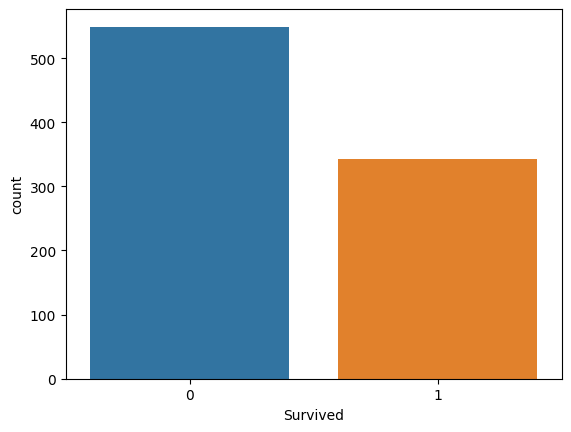

In [7]:
# 타깃값 비율 시각화
sns.countplot(x='Survived', data=data);
#사망자:생존자 비율은 약 6:4

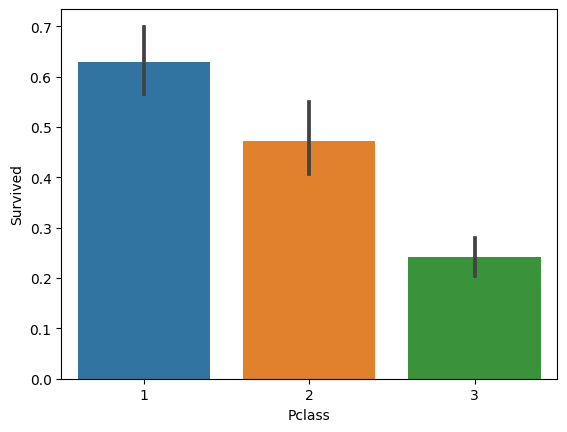

In [8]:
# Pclass(티켓 등급)별 생존율
sns.barplot(x = 'Pclass', y = 'Survived', data = data);
# 티켓 등급이 높을수록 생존율도 높다.

In [10]:
# Name(이름)별 생존율
data['Name']
# 이름에 따른 생존율은 의미없는 수치다.
# 그러나 영문 성명 특성상 Mr., Miss., Mrs. 등의 타이틀을 추출하면 의미있는 정보가 될 수 있다.

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
# 이름에서 타이틀 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [12]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [13]:
# 너무 많은 타이틀이 있으므로 적절히 4개 그룹으로 묶기
data['Title'] = data['Title'].replace(
    ['Mlle', 'Mme',  'Ms',   'Dr', 'Major', 'Sir', 'Capt', 'Lady', 'Countess', 'Jonkheer', 'Col',   'Rev',   'Don'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr',    'Mr',  'Mr',   'Mrs',  'Mrs',      'Other',    'Other', 'Other', 'Other']
)

In [14]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

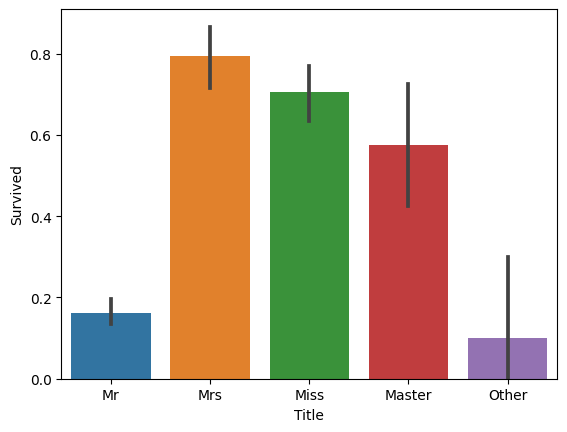

In [15]:
sns.barplot(x='Title', y='Survived', data=data);

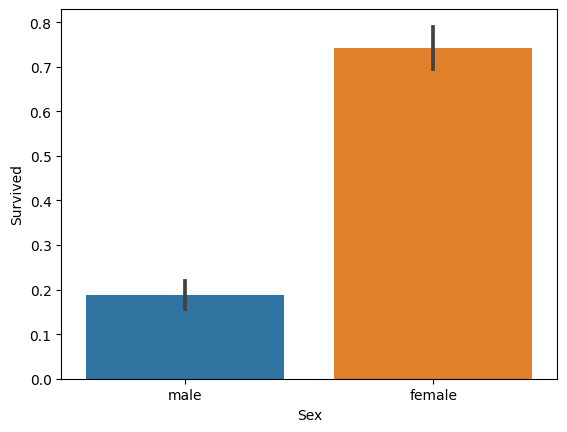

In [16]:
# Sex(성별)별 생존율
sns.barplot(x='Sex', y='Survived', data=data);
# 여성의 생존율이 훨씬 높다.

<Axes: xlabel='Age', ylabel='Survived'>

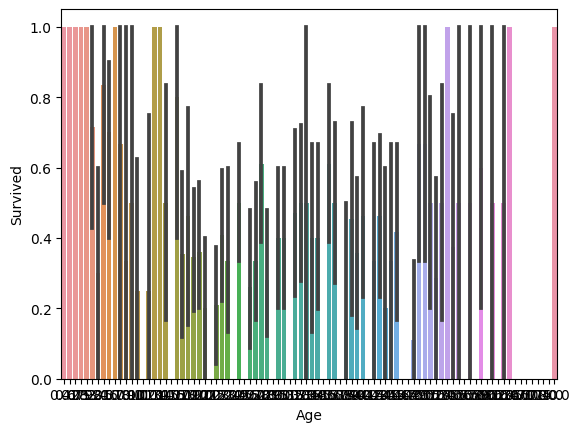

In [17]:
# Age(나이)별 생존율
sns.barplot(x='Age', y='Survived', data=data)
# 우선, Age 결측값 처리 필요
# Age_Group 피처를 만들고, 기존에 있던 Age 피처는 제거

In [18]:
# Age 피처에는 177개의 결측값이 있어서 결측값을 모두 -0.5로 바꾸기
data['Age'] = data['Age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] # 카테고리로 나눌 구간
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'] # 카테고리명

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young Adult


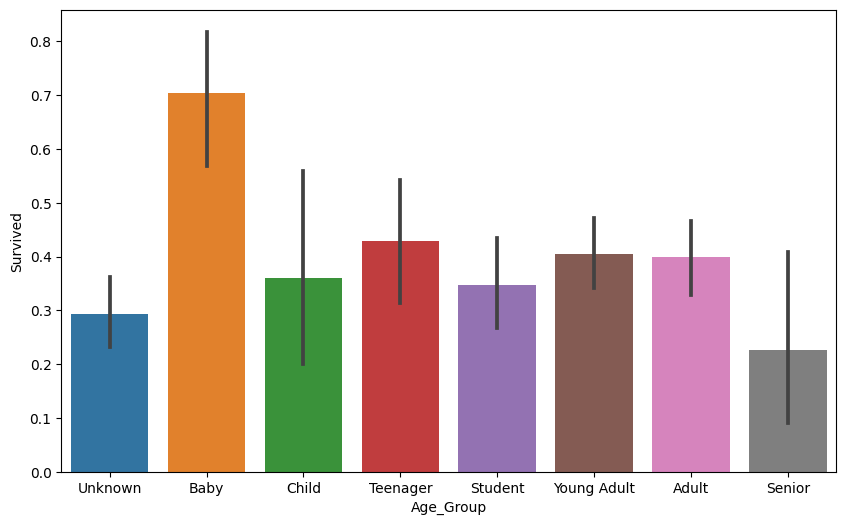

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Survived', data=data);
# 아기의 생존율이 가장 높고, 어르신들의 생존율이 가장 낮다.

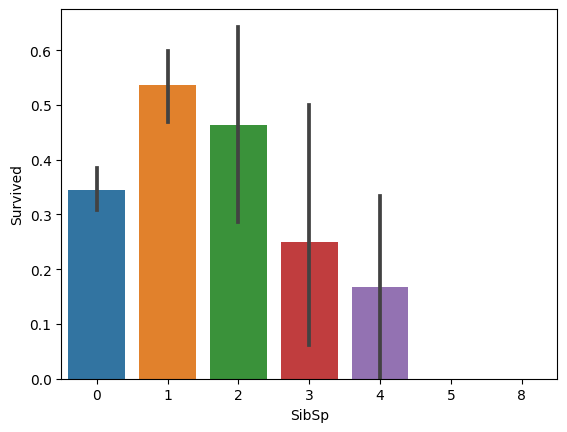

In [22]:
# SibSp(함께 탑승한 형제자매/배우자 수)별 생존율
sns.barplot(x='SibSp', y='Survived', data=data);
# 형제자매/배우자 수가 1명 이상일 때는 그 수가 많을수록 생존율이 낮다.

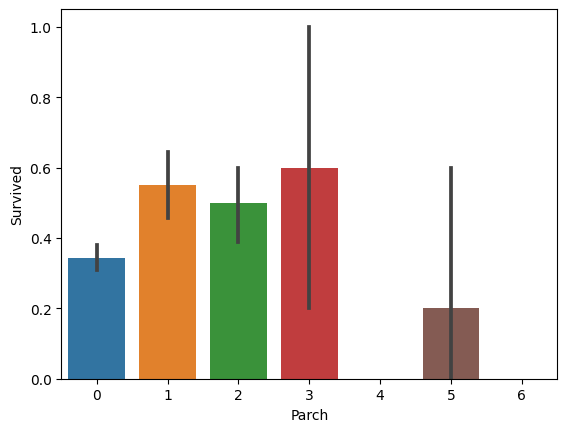

In [23]:
# Parch(함께 탑승한 부모/자식 수)별 생존율
sns.barplot(x='Parch', y='Survived', data=data);
# 부모/자식 수가 1~3명 이상일 때 대체로 생존율이 높다

In [25]:
#  Ticket(티켓 번호)별 생존율(?)
data['Ticket']
# 티켓 번호별 생존율은 의미없는 수치다.
# 따라서 Ticket 피처는 제거

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

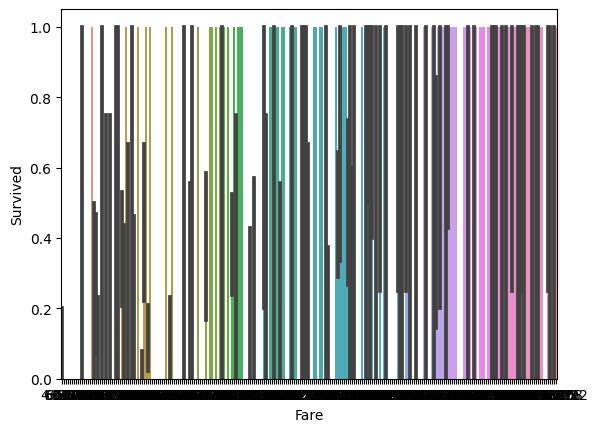

In [26]:
#  Fare(여객 운임)별 생존율
sns.barplot(x='Fare', y='Survived', data=data);

In [27]:
# Fare를 4개의 카테고리 구간으로 나눔
bins = [-np.inf, 8, 14, 31, np.inf] # 카테고리로 나눌 구간
labels = ['low', 'medium', 'high', 'super-high'] # 카테고리명

data['Fare_Group'] = pd.cut(data['Fare'], bins=bins, labels=labels)

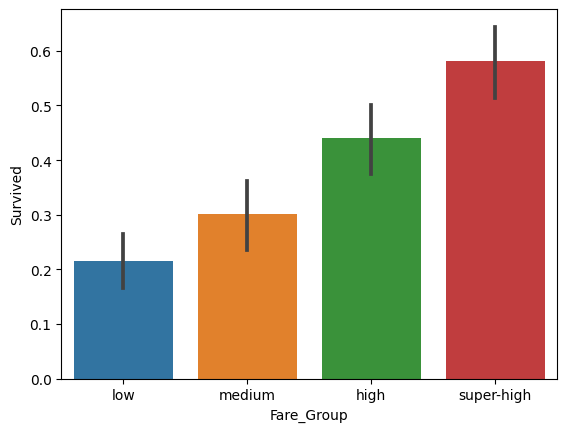

In [29]:
sns.barplot(x='Fare_Group', y='Survived', data=data);
# 높은 운임을 지불한 승객의 생존율이 높다.
# Fare_Group으로 피처를 그룹화한 뒤, 기존에 있던 Fare 피처는 제거

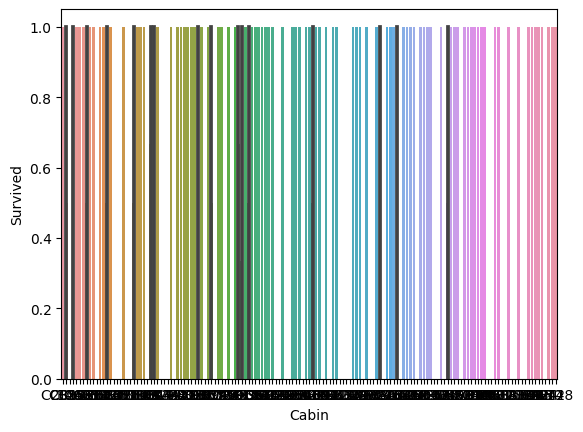

In [30]:
# Cabin(객실 번호)별 생존율
sns.barplot(x='Cabin', y='Survived', data=data);

In [31]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
data['Cabin'].isnull().sum()

687

In [ ]:
# Cabin 피처는 전체 891개 데이터 687개가 결측값이다.
# 결측값이 너무 많아 Cabin 피처는 제거하는 게 바람직하다.

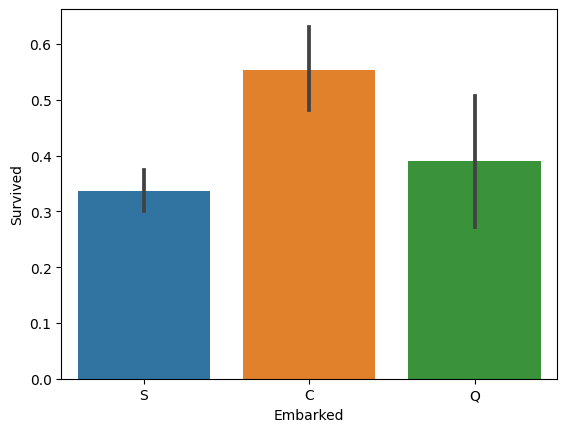

In [33]:
#  Embarked(승선 항구)별 생존율
sns.barplot(x='Embarked', y='Survived', data=data);
# C > Q > S순으로 생존율이 높다

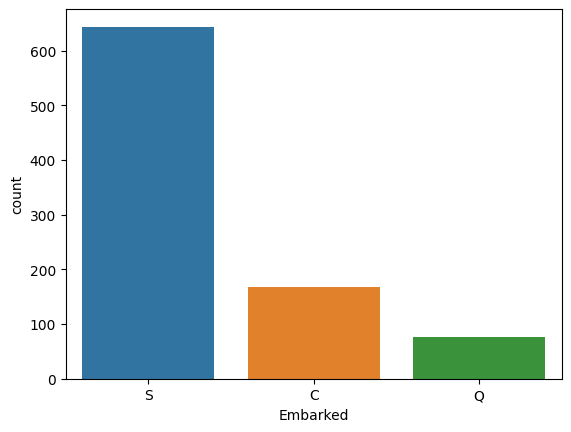

In [34]:
# Embarked 피처의 결측값을 최빈값인 S로 대체하는 게 적절하다.
sns.countplot(x='Embarked', data=data);

# 모델링

### 피처 엔지니어링

In [53]:
# 데이터 분석을 위한 라이브러리
import numpy as np
import pandas as pd

In [54]:
train = pd.read_csv('train.csv')

In [55]:
# PassengerId는 순번을 나타내는 값으로 아무 의미 없는 데이터이므로, 모델 훈련할 때는 제거
train = train.drop('PassengerId', axis=1)

In [56]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
# Name에서 Title 추출
# 그다음 Name 피처 삭제

In [57]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

In [59]:
# 너무 많은 타이틀이 있으므로 적절히 4개 그룹으로 묶기
train['Title'] = train['Title'].replace(
    ['Mlle', 'Mme',  'Ms',   'Dr', 'Major', 'Sir', 'Capt', 'Lady', 'Countess', 'Jonkheer', 'Col',   'Rev',   'Don',   'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr',    'Mr',  'Mr',   'Mrs',  'Mrs',      'Other',    'Other', 'Other', 'Other', 'Other']
)

In [60]:
train = train.drop('Name', axis=1)

In [61]:
# 우선, Age 결측값 처리 필요
# Age_Group 피처를 만들고, 기존에 있던 Age 피처는 제거
train.groupby('Title').agg({'Age': 'mean'})

,Age
Title,
Master,4.574167
Miss,21.860000
Mr,32.721814
Mrs,35.981818
Other,45.300000


In [62]:
train.loc[(train['Age'].isnull()) & (train['Title']=='Master'), 'Age'] = 5
# 나이에 결측값있고, 타이틀이 마스터인 사람의 나이는 5살로해라 왜냐면 마스터의 평균나이는 5살이니깐
train.loc[(train['Age'].isnull()) & (train['Title']=='Miss'), 'Age'] = 22
train.loc[(train['Age'].isnull()) & (train['Title']=='Mr'), 'Age'] = 33
train.loc[(train['Age'].isnull()) & (train['Title']=='Mrs'), 'Age'] = 36
train.loc[(train['Age'].isnull()) & (train['Title']=='Other'), 'Age'] = 45

In [63]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf] # 카테고리로 나눌 구간
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'] # 카테고리명

train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels)

In [64]:
train = train.drop('Age', axis=1)

In [65]:
# Ticket 피처는 제거
train = train.drop('Ticket', axis=1)

In [66]:
# Fare를 4개의 카테고리 구간으로 나눔
bins = [-np.inf, 8, 14, 31, np.inf] # 카테고리로 나눌 구간
labels = ['low', 'medium', 'high', 'super-high'] # 카테고리명

train['Fare_Group'] = pd.cut(train['Fare'], bins=bins, labels=labels)

In [67]:
train = train.drop('Fare', axis=1)

In [68]:
# 결측값이 너무 많아 Cabin 피처는 제거하는 게 바람직하다
train = train.drop('Cabin', axis=1)

In [69]:
# Embarked 피처의 결측값을 S로 대체하는 게 적절하다.
train['Embarked'] = train['Embarked'].fillna('S')

In [70]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Group,Fare_Group
0,0,3,male,1,0,S,Mr,Student,low
1,1,1,female,1,0,C,Mrs,Adult,super-high
2,1,3,female,0,0,S,Miss,Young Adult,low
3,1,1,female,1,0,S,Mrs,Young Adult,super-high
4,0,3,male,0,0,S,Mr,Young Adult,medium
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Other,Young Adult,medium
887,1,1,female,0,0,S,Miss,Student,high
888,0,3,female,1,2,S,Miss,Student,high
889,1,1,male,0,0,C,Mr,Young Adult,high


In [ ]:
# 머신러닝 모델은 숫자값만 인식하므로, 문자열은 숫자로 바꿔주기(데이터 인코딩)


In [73]:
from sklearn.preprocessing import OrdinalEncoder

# 문자열 피처
string_features = ['Sex', 'Embarked', 'Title', 'Age_Group', 'Fare_Group']

# 인코더 생성
ordinal_encoder = OrdinalEncoder()


# 훈련 데이터에서 인코딩 피팅
ordinal_encoder.fit(train[string_features])

# 훈련 데이터, 테스트 데이터에 인코딩 적용
train[string_features] = ordinal_encoder.transform(train[string_features])
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Group,Fare_Group
0,0,3,1.0,1,0,2.0,2.0,4.0,1.0
1,1,1,0.0,1,0,0.0,3.0,0.0,3.0
2,1,3,0.0,0,0,2.0,1.0,6.0,1.0
3,1,1,0.0,1,0,2.0,3.0,6.0,3.0
4,0,3,1.0,0,0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,2.0,4.0,6.0,2.0
887,1,1,0.0,0,0,2.0,1.0,4.0,0.0
888,0,3,0.0,1,2,2.0,1.0,4.0,0.0
889,1,1,1.0,0,0,0.0,2.0,6.0,0.0


In [74]:
# y 입력값 만들기 lable
y데이터 = train['Survived'].values
y데이터

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [76]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Group,Fare_Group
0,0,3,1.0,1,0,2.0,2.0,4.0,1.0
1,1,1,0.0,1,0,0.0,3.0,0.0,3.0
2,1,3,0.0,0,0,2.0,1.0,6.0,1.0
3,1,1,0.0,1,0,2.0,3.0,6.0,3.0
4,0,3,1.0,0,0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,2.0,4.0,6.0,2.0
887,1,1,0.0,0,0,2.0,1.0,4.0,0.0
888,0,3,0.0,1,2,2.0,1.0,4.0,0.0
889,1,1,1.0,0,0,0.0,2.0,6.0,0.0


In [77]:
# x 입력값 만들기
# data.iterrow 가 뭐냐면 data 라는 데이터프레임을 한 행씩 출력할수가 있는거다
x데이터 = []
for i, rows in train.iterrows():
    x데이터.append([rows['Pclass'],rows['Sex'],rows['SibSp'],rows['Parch'],rows['Embarked'],rows['Title'],rows['Age_Group'],rows['Fare_Group']])
print(x데이터)

[[3.0, 1.0, 1.0, 0.0, 2.0, 2.0, 4.0, 1.0], [1.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 3.0], [3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 6.0, 1.0], [1.0, 0.0, 1.0, 0.0, 2.0, 3.0, 6.0, 3.0], [3.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.0, 2.0], [3.0, 1.0, 0.0, 0.0, 1.0, 2.0, 6.0, 2.0], [1.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 3.0], [3.0, 1.0, 3.0, 1.0, 2.0, 0.0, 1.0, 0.0], [3.0, 0.0, 0.0, 2.0, 2.0, 3.0, 6.0, 2.0], [2.0, 0.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0], [3.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0], [3.0, 1.0, 0.0, 0.0, 2.0, 2.0, 4.0, 2.0], [3.0, 1.0, 1.0, 5.0, 2.0, 2.0, 0.0, 3.0], [3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 5.0, 1.0], [2.0, 0.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0], [3.0, 1.0, 4.0, 1.0, 1.0, 0.0, 1.0, 0.0], [2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.0, 2.0], [3.0, 0.0, 1.0, 0.0, 2.0, 3.0, 6.0, 0.0], [3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0], [2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.0, 0.0], [2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.0, 2.0], [3.0, 0.0, 0.0, 0.0, 1.0, 1.0, 5.0, 2.0], [1.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.

### 딥러닝 model 디자인하기

In [78]:
# 히든레이어 갯수가 3개인이유? 
# 내맘, 결과가 잘나올때 까지 추가해주거나 값을 변경해주면 되는거임

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
    # 여기서 시그모이드 함수 써준이유 : 시그모이드는 모든 값을 0에서 1사이로 압축을 시켜주는 고마운 액티베이션
])

### 모델 컴파일 하기

In [79]:
# optimizer 는 learning late를 알아서 설정해주는 고마운녀석 걍 기본적으로 adam써라
# loss 함수는 문제마다 맞는게 있는데 우리는 0에서 1사이에 값을 쓸거니깐
# binary_crossentropy 이거 쓰면 된다 
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

### model 학습(fit) 시키기

In [80]:

model.fit(np.array(x데이터), np.array(y데이터), epochs = 1000)

Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6813
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7250
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7565
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7800
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7868
Epoch 6/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8058
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8036
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8103
Epoch 9/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8171
Epoch 10/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8238

### 예측

In [81]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Group,Fare_Group
0,0,3,1.0,1,0,2.0,2.0,4.0,1.0
1,1,1,0.0,1,0,0.0,3.0,0.0,3.0
2,1,3,0.0,0,0,2.0,1.0,6.0,1.0
3,1,1,0.0,1,0,2.0,3.0,6.0,3.0
4,0,3,1.0,0,0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,2.0,4.0,6.0,2.0
887,1,1,0.0,0,0,2.0,1.0,4.0,0.0
888,0,3,0.0,1,2,2.0,1.0,4.0,0.0
889,1,1,1.0,0,0,0.0,2.0,6.0,0.0


In [84]:
예측값1 = model.predict([[3, 0.0, 2, 0, 2.0, 4.0, 6.0, 2.0]])
예측값2 = model.predict([[1, 1.0, 1, 2, 0.0, 2.0, 2.0, 1.0]])
print('사람 1' ,예측값1)
print('사람 2' ,예측값2)

1/1 [==============================] - 0s 36ms/step
사람 1 [[0.27848262]]
사람 2 [[0.9787773]]
